# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [21]:
from sklearn import datasets

'''
datasets.load_digits
    Load and return the digits dataset (classification).
    
    n_class : The number of classes to return.
'''

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

In [22]:
print(f'X.shape={X.shape}')
X

X.shape=(537, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  1., 10., ..., 10.,  9.,  0.],
       [ 0.,  0., 15., ...,  6.,  2.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [23]:
print(f'y.shape={y.shape}')
y

y.shape=(537,)


array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,

載入 相關套件 並 執行 PCA 實驗 ...

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition # <= New 
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

In [25]:
# Erwin: Keep 3 components ?
pca = decomposition.PCA(n_components=3)

In [26]:
# Run PCA
pca.fit(X)
X = pca.transform(X)

# Erwin: after transform, the X.shape becomes 3
print(f'X.shape = {X.shape}')
pca

X.shape = (537, 3)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

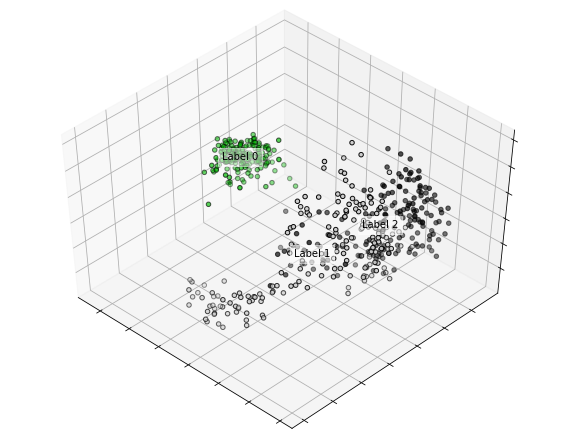

In [27]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('Label 0', 0), ('Label 1', 1), ('Label 2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

* 原本 dataset 是 64 維度 (537 x 64), 經過 decomposition 後，變成 3 個維度 537 x 3
* 看到 Label 0 被 clustered 很好, Label 1 與 Label 2 也能正確區隔開